In [5]:
!pip install fastf1

import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="whitegrid")


# --- 24 race track lengths for 2024 season (km) ---
track_lengths_km = {
    "Bahrain Grand Prix": 5.412,
    "Saudi Arabian Grand Prix": 6.174,
    "Australian Grand Prix": 5.278,
    "Japanese Grand Prix": 5.807,
    "Chinese Grand Prix": 5.451,
    "Miami Grand Prix": 5.412,
    "Emilia Romagna Grand Prix": 4.909,
    "Monaco Grand Prix": 3.337,
    "Canadian Grand Prix": 4.361,
    "Spanish Grand Prix": 4.657,
    "Austrian Grand Prix": 4.318,
    "British Grand Prix": 5.891,
    "Hungarian Grand Prix": 4.381,
    "Belgian Grand Prix": 7.004,
    "Dutch Grand Prix": 4.259,
    "Italian Grand Prix": 5.793,
    "Azerbaijan Grand Prix": 6.003,
    "Singapore Grand Prix": 4.940,
    "United States Grand Prix": 5.513,
    "Mexico City Grand Prix": 4.304,
    "São Paulo Grand Prix": 4.309,
    "Las Vegas Grand Prix": 6.201,
    "Qatar Grand Prix": 5.419,
    "Abu Dhabi Grand Prix": 5.281
}

# Street circuits
street_circuits = ["Monaco Grand Prix", "Azerbaijan Grand Prix", "Las Vegas Grand Prix", "Singapore Grand Prix"]


In [7]:
all_laps = []
race_rounds = list(range(1, 25))

for rnd in race_rounds:
    print(f"Loading race {rnd}...")
    session = fastf1.get_session(2024, rnd, 'R')
    session.load(telemetry=False, weather=True)

    laps = session.laps[["Driver", "LapNumber", "LapTime", "Compound", "Team"]].copy()
    laps.rename(columns={"Compound": "TireCompound"}, inplace=True)

    # Circuit type
    laps["CircuitType"] = "Permanent"
    if session.event["EventName"] in street_circuits:
        laps["CircuitType"] = "Street"

    # Tire age
    laps["TireAge"] = laps.groupby("Driver")["LapNumber"].cumcount() + 1

    # Rainfall
    laps["Rainfall"] = int(session.weather['Rainfall'].max() > 0) if hasattr(session, "weather") and session.weather is not None else 0

    # Lap time in seconds
    laps["LapTimeSeconds"] = laps["LapTime"].dt.total_seconds()

    # Race name
    laps["RaceName"] = session.event["EventName"]

    # Avg speed (optional, can ignore for now)
    circuit_len_km = track_lengths_km[session.event["EventName"]]
    laps["AvgSpeed"] = circuit_len_km / (laps["LapTimeSeconds"] / 3600)

    all_laps.append(laps)

df_laps = pd.concat(all_laps, ignore_index=True)
print("Done! Shape:", df_laps.shape)
df_laps.head()


Loading race 1...


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

Loading race 2...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergas

Loading race 3...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
INFO:fastf1.fastf1.core:Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cache

Loading race 4...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Usi

Loading race 5...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using ca

Loading race 6...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req       

Loading race 7...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using

Loading race 8...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Canadian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	U

Loading race 9...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Usi

Loading race 10...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Us

Loading race 11...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Usi

Loading race 12...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Hungarian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 

Loading race 13...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Fail

Loading race 14...


core        WARNING 	Fixed incorrect tyre stint information for driver '14'
core        WARNING 	Fixed incorrect tyre stint information for driver '3'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '22'
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:L

Loading race 15...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Usi

Loading race 16...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.erg

Loading race 17...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Singapore Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergas

Loading race 18...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
core           INFO 	Loading data for United States Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for United States Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req       

Loading race 19...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '4', '81', '63', '11', '27', '30', '43', '20', '10', '14', '22', '18', '23', '77', '31', '24', '44']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '55', '1', '4', '81', '63', '11', '27', '30', '43', '20', '10', '14', '22', '18', '23', '77', '31', '24', '44']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Mexico City Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req         

Loading race 20...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '16', '44', '63', '1', '20', '81', '27', '10', '18', '43', '31', '77', '24', '30', '11', '14', '23', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['55', '4', '16', '44', '63', '1', '20', '81', '27', '10', '18', '43', '31', '77', '24', '30', '11', '14', '23', '22']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            I

Loading race 21...


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16', '4', '22', '81', '30', '44', '11', '50', '77', '14', '24', '55', '43', '23', '18', '27']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '31', '10', '63', '16', '4', '22', '81', '30', '44', '11', '50', '77', '14', '24', '55', '43', '23', '18', '27']
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached d

Loading race 22...


core        WARNING 	Driver 63: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 44: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver  1: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  4: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 81: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 30: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 77: Lap timing integrity check failed for 2 lap(s)
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 63 completed th

Loading race 23...


core        WARNING 	Fixed incorrect tyre stint information for driver '43'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '43', '31']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '43', '31']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.7.0]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cache

Loading race 24...


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '55', '16', '44', '63', '1', '10', '27', '14', '81', '23', '22', '24', '18', '61', '20', '30', '77', '43', '11']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '55', '16', '44', '63', '1', '10', '27', '14', '81', '23', '22', '24', '18', '61', '20', '30', '77', '43', '11']


Done! Shape: (26606, 11)


,Driver,LapNumber,LapTime,TireCompound,Team,CircuitType,TireAge,Rainfall,LapTimeSeconds,RaceName,AvgSpeed
0,VER,1.0,0 days 00:01:37.284000,SOFT,Red Bull Racing,Permanent,1,0,97.284,Bahrain Grand Prix,200.271370
1,VER,2.0,0 days 00:01:36.296000,SOFT,Red Bull Racing,Permanent,2,0,96.296,Bahrain Grand Prix,202.326161
2,VER,3.0,0 days 00:01:36.753000,SOFT,Red Bull Racing,Permanent,3,0,96.753,Bahrain Grand Prix,201.370500
3,VER,4.0,0 days 00:01:36.647000,SOFT,Red Bull Racing,Permanent,4,0,96.647,Bahrain Grand Prix,201.591358
4,VER,5.0,0 days 00:01:37.173000,SOFT,Red Bull Racing,Permanent,5,0,97.173,Bahrain Grand Prix,200.500139


In [8]:
train_df = df_laps[df_laps["RaceName"] != "Abu Dhabi Grand Prix"]
test_df = df_laps[df_laps["RaceName"] == "Abu Dhabi Grand Prix"]

categorical_features = ["Driver", "Team", "TireCompound", "CircuitType"]
numeric_features = ["LapNumber", "TireAge", "Rainfall"]
target = ["LapTimeSeconds"]  # or "AvgSpeed"


In [9]:
# Drop rows with missing target in train set
train_df_clean = train_df.dropna(subset=["LapTimeSeconds"]).copy()
X_train = train_df_clean[categorical_features + numeric_features]
y_train = train_df_clean["LapTimeSeconds"].values  # as 1D array

# Same for test set (optional but recommended)
test_df_clean = test_df.dropna(subset=["LapTimeSeconds"]).copy()
X_test = test_df_clean[categorical_features + numeric_features]
y_test = test_df_clean["LapTimeSeconds"].values


In [10]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

X_train_final = pd.concat(
    [X_train[numeric_features],
     pd.DataFrame(X_train_cat, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)],
    axis=1
)

X_test_final = pd.concat(
    [X_test[numeric_features],
     pd.DataFrame(X_test_cat, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)],
    axis=1
)


In [11]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=15)
model.fit(X_train_final, y_train)

# Predict
y_pred = model.predict(X_test_final)
test_df_clean["PredLapTime"] = y_pred


In [12]:
# Compute per-driver predicted vs actual averages
avg_preds = test_df_clean.groupby("Driver")["PredLapTime"].mean()
avg_actuals = test_df_clean.groupby("Driver")["LapTimeSeconds"].mean()

comparison = pd.DataFrame({
    "Predicted": avg_preds,
    "Actual": avg_actuals
})

comparison["Error"] = comparison["Predicted"] - comparison["Actual"]

print(comparison)


        Predicted     Actual     Error
Driver                                
ALB     90.825620  91.307754 -0.482134
ALO     91.407252  90.959724  0.447528
BOT     93.859903  94.909333 -1.049430
COL     95.869901  95.016538  0.853363
DOO     90.531816  91.576246 -1.044430
GAS     92.178901  90.790534  1.388367
HAM     92.106894  90.168517  1.938377
HUL     90.172907  90.842155 -0.669248
LAW     94.575531  92.308164  2.267367
LEC     90.905030  90.089983  0.815047
MAG     95.370697  92.471719  2.898978
NOR     89.674596  89.539500  0.135096
PIA     92.052514  90.984690  1.067825
RUS     89.291125  90.186707 -0.895582
SAI     89.531687  89.640052 -0.108365
STR     90.556822  91.346737 -0.789915
TSU     90.507123  91.368930 -0.861807
VER     89.123553  90.398931 -1.275378
ZHO     90.671143  91.413947 -0.742804


In [13]:
rmse = mean_squared_error(comparison["Actual"], comparison["Predicted"]) ** 0.5
mae = mean_absolute_error(comparison["Actual"], comparison["Predicted"])
r2 = r2_score(comparison["Actual"], comparison["Predicted"])

print("Random Forest Performance (Driver Averages):")
print(f"RMSE: {rmse:.3f} sec")
print(f"MAE: {mae:.3f} sec")
print(f"R²: {r2:.3f}")


Random Forest Performance (Driver Averages):
RMSE: 1.240 sec
MAE: 1.038 sec
R²: 0.281


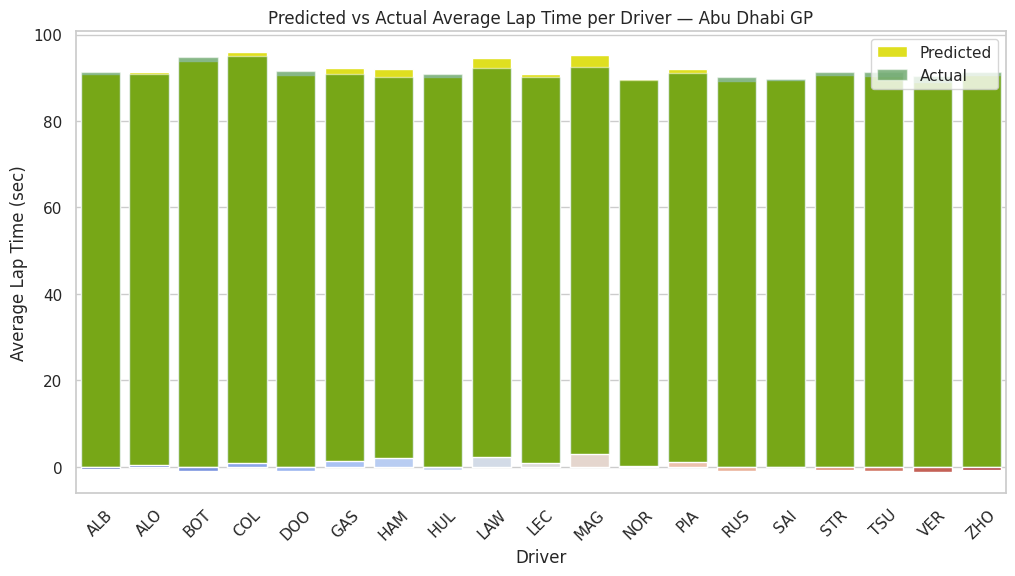

In [22]:
# Predicted vs Actual
plt.figure(figsize=(12,6))
sns.barplot(x=comparison.index, y=comparison["Predicted"], color='yellow', label="Predicted")
sns.barplot(x=comparison.index, y=comparison["Actual"], color='green', alpha=0.5, label="Actual")
sns.barplot(x=comparison.index, y=comparison["Error"], hue=comparison.index, dodge=False, palette="coolwarm", legend=False)

plt.ylabel("Average Lap Time (sec)")
plt.title("Predicted vs Actual Average Lap Time per Driver — Abu Dhabi GP")
plt.xticks(rotation=45)
plt.legend()
plt.show()

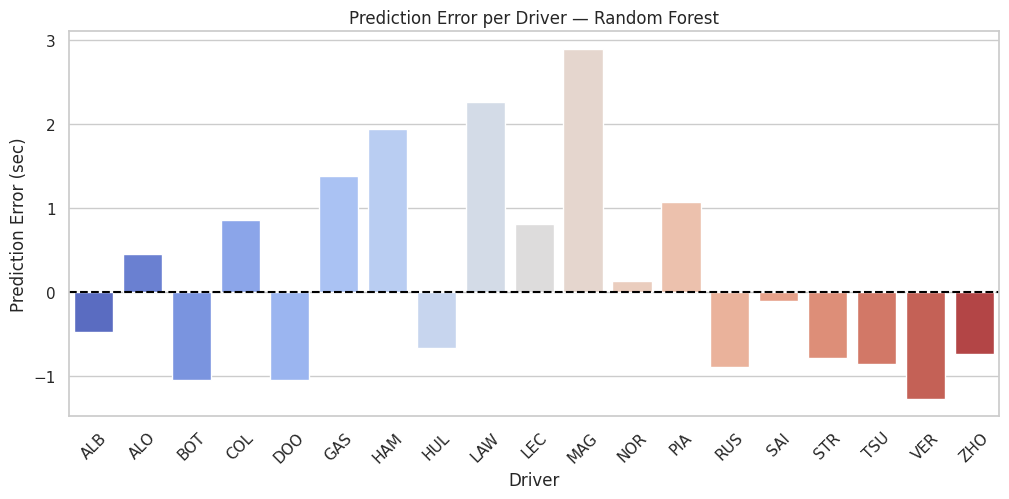

In [23]:
# Prediction Error
plt.figure(figsize=(12,5))

sns.barplot(
    x=comparison.index,
    y=comparison["Error"],
    hue=comparison.index,  # assign hue to each bar
    dodge=False,           # keep all bars in one group
    palette="coolwarm",
    legend=False
)

plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Prediction Error (sec)")
plt.title("Prediction Error per Driver — Random Forest")
plt.xticks(rotation=45)
plt.show()


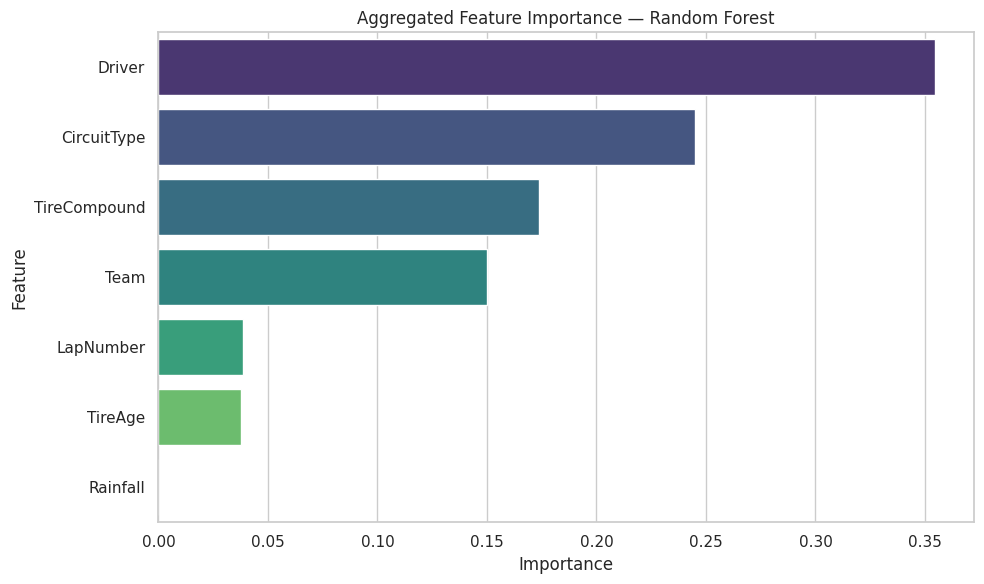

In [24]:
importances = model.feature_importances_
feature_names = X_train_final.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

def map_original_feature(col):
    for cat in categorical_features:
        if col.startswith(cat + "_"):
            return cat
    if col in numeric_features:
        return col
    return col

feature_importance_df["OriginalFeature"] = feature_importance_df["Feature"].apply(map_original_feature)
agg_importance = feature_importance_df.groupby("OriginalFeature")["Importance"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))

sns.barplot(
    x=agg_importance.values,
    y=agg_importance.index,
    hue=agg_importance.index,  # assign each bar a hue
    dodge=False,               # keep bars in one group
    palette="viridis",
    legend=False
)

plt.title("Aggregated Feature Importance — Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
